In [68]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import optimize
from scipy.stats import chi2
import pandas as pd
import os.path as path
import urllib.request

In [67]:
file = 'Sigmoid.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
if not path.exists( file ):
    Path_ = urllib.request.urlretrieve( url , file )
    print( 'File loaded' )
else:
    Path_ = file

In [138]:
Data = pd.read_csv(Path_,sep=',')

x = np.float64( Data['x'] )
y = np.float64( Data['y'] )
n = y.size
h = 0.01


In [137]:
## A

def Modelo_ajuste(x, theta_0, theta_1, theta_2):
    funcion = (theta_0) / (theta_1 + np.exp(-theta_2 * x))
    return funcion

In [136]:
## B

def Funcion_costo(x, y, theta_1, theta_2, theta_3):
    chi_cuadrado = 0
    
    for i in range(n):
        chi_cuadrado += (y[i] - Modelo_ajuste(x[i],theta_1,theta_2,theta_3))**2
    return chi_cuadrado 


In [135]:
## C

def Derivadas_parciales(x, y, theta_0, theta_1, theta_2):
    gradiente = np.zeros(3)
    
    gradiente[0] = ( Funcion_costo(x, y, theta_0+h, theta_1, theta_2) - Funcion_costo(x, y, theta_0-h, theta_1, theta_2))/(2*h)
    gradiente[1] = ( Funcion_costo(x, y, theta_0, theta_1+h, theta_2) - Funcion_costo(x, y, theta_0, theta_1-h, theta_2))/(2*h)
    gradiente[2] = ( Funcion_costo(x, y, theta_0, theta_1, theta_2+h) - Funcion_costo(x, y, theta_0, theta_1, theta_2-h))/(2*h)
    return gradiente
   

In [134]:
## D

def Descenso_gradiente(theta, lr, itmax, error):
    
    iteracion = 0
    distancia = 1
    
    while distancia > float(error) and iteracion < int(itmax):
            x_i = Derivadas_parciales(x, y, theta[0], theta[1], theta[2])
            theta = theta - lr * x_i
            distancia = np.linalg.norm(theta - optimize.curve_fit(Modelo_ajuste, x, y)[0] )
            iteracion += 1
                
    return theta, distancia,iteracion

In [139]:
## E

Punto_ini = np.array([1,1,1])

parametros = Descenso_gradiente(Punto_ini, 5e-4,2e4,1e-2)

theta_0 = parametros[0][0]
theta_1 = parametros[0][1]
theta_2 = parametros[0][2]

chi_cuadrado = Funcion_costo(x, y, theta_0, theta_1, theta_2)

In [162]:
print(f'Los parámetros θ0, θ1 y θ2 que mejor se ajustan a los datos del sigmoide generado por el archivo Sigmoid.csv son:',
      'θ0 = {theta_0}, θ1 = {theta_1},θ2 = {theta_2}')
print()
print(f'Valor para chi cuadrado de: {chi_cuadrado}')
print()
print(f'Valor de error absoluto: {parametros[1]}')
print()
print(f'Total de número de iteraciones: {parametros[2]}')

Los parámetros θ0, θ1 y θ2 que mejor se ajustan a los datos del sigmoide generado por el archivo Sigmoid.csv son: θ0 = {theta_0}, θ1 = {theta_1},θ2 = {theta_2}

Valor para chi cuadrado de: 0.10503710593049193

Valor de error absoluto: 0.009993016256835128

Total de número de iteraciones: 19946


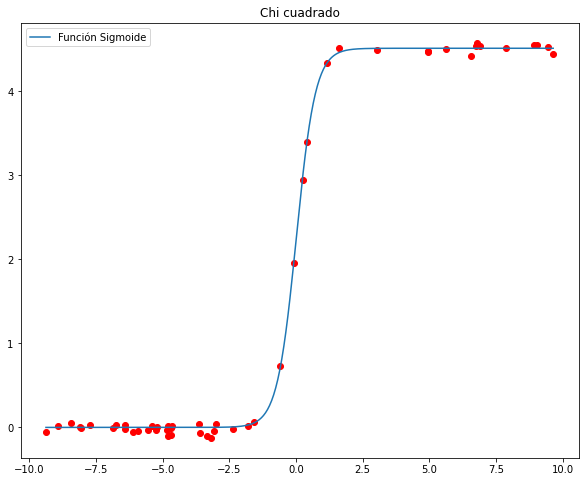

In [161]:
x1 = np.linspace(min(x),max(x),500)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y,c='r')
plt.plot(x1,Modelo_ajuste(x1,theta_0,theta_1,theta_2),label='Función Sigmoide')
plt.legend()
plt.title('Chi cuadrado')
plt.show()
